In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("C:/Users/shrut/Downloads/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [8]:
x = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [12]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,test_size=0.2)

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
y_pred = knn.predict(xtest)

In [26]:
def evaluate(y_true,y_predict,model_name):
    accuracy = accuracy_score(y_true,y_predict)
    recall = recall_score(y_true,y_predict)
    precision = precision_score(y_true,y_predict)
    cm = confusion_matrix(y_true,y_predict)
    cr = classification_report(y_true,y_predict)
    print("---",model_name,"---")
    print("Accuracy: ",accuracy)
    print("Recall score: ",recall)
    print("Precision score: ",precision)
    print("Confusion Matrix:\n",cm,"\n")
    print("Classification report:\n",cr,"\n")

evaluate(ytest,y_pred,"K Nearest Neighbors")

--- K Nearest Neighbors ---
Accuracy:  0.6883116883116883
Recall score:  0.5660377358490566
Precision score:  0.5454545454545454
Confusion Matrix:
 [[76 25]
 [23 30]] 

Classification report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       101
           1       0.55      0.57      0.56        53

    accuracy                           0.69       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154
 



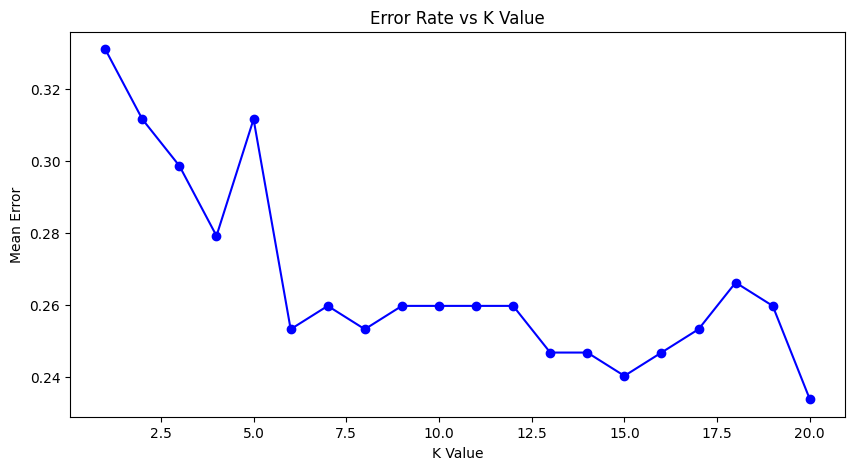

In [29]:
error = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    error.append(np.mean(pred_i != ytest))
plt.figure(figsize=(10,5))
plt.plot(range(1, 21), error, marker='o', color='blue')
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

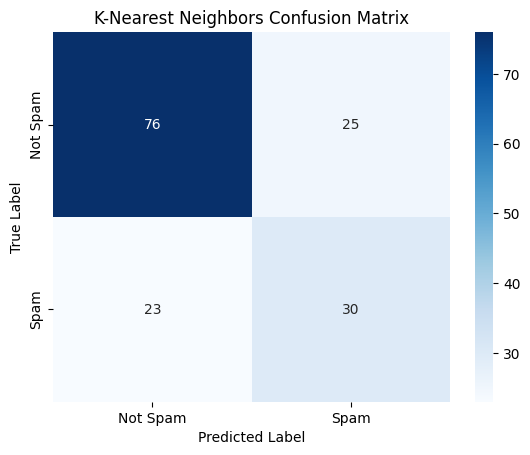

In [32]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
    disp.set_title(f"{model_name} Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(ytest, y_pred, "K-Nearest Neighbors")